Path to dataset files: /kaggle/input/nifty50-stock-market-data
Loaded file: /kaggle/input/nifty50-stock-market-data/RELIANCE.csv

✅ Model Evaluation (Next-Day Price Prediction):
MAE   (Mean Absolute Error):      25.83
RMSE  (Root Mean Squared Error):  36.66
R²    (R-squared score):          0.99


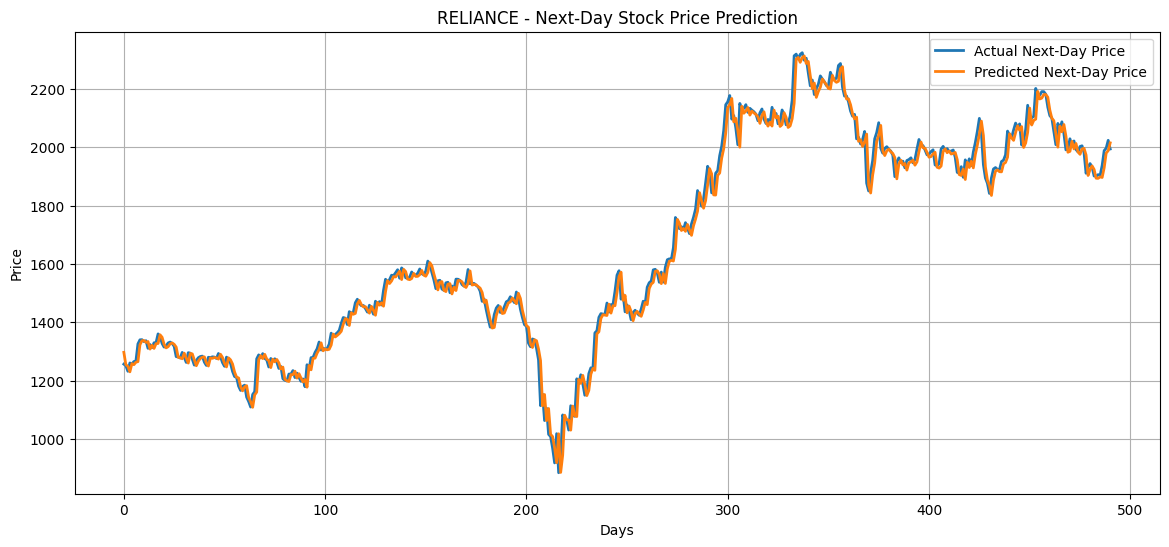

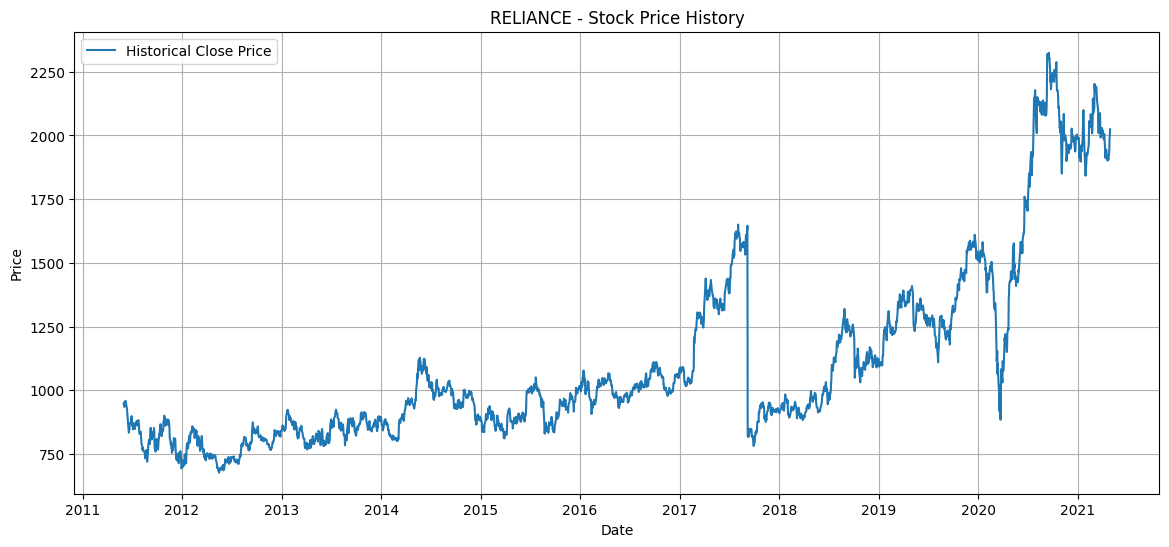

In [6]:
# ✅ STOCK PRICE PREDICTION (NEXT-DAY) FROM KAGGLE RELIANCE CSV FILE

# 📦 Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import kagglehub
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# 📥 Load dataset from Kaggle
path = kagglehub.dataset_download("rohanrao/nifty50-stock-market-data")
print("Path to dataset files:", path)

# 📄 Choose RELIANCE.csv
stock_file = os.path.join(path, 'RELIANCE.csv')
df = pd.read_csv(stock_file)
print(f"Loaded file: {stock_file}")

# 🧹 Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')

# 🎯 Predict next-day closing price
df['Next_Close'] = df['Close'].shift(-1)

# 🧠 Feature engineering
df['Prev_Close'] = df['Close']
df['5day_MA'] = df['Close'].rolling(window=5).mean()

# 🚮 Drop rows with NaN values
df = df.dropna()

# 📊 Features and target
X = df[['Prev_Close', '5day_MA']]
y = df['Next_Close']

# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 🤖 Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 📏 Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Model Evaluation (Next-Day Price Prediction):")
print(f"MAE   (Mean Absolute Error):      {mae:.2f}")
print(f"RMSE  (Root Mean Squared Error):  {rmse:.2f}")
print(f"R²    (R-squared score):          {r2:.2f}")

# 📈 Plot actual vs predicted next-day prices
plt.figure(figsize=(14, 6))
plt.plot(y_test.values, label='Actual Next-Day Price', linewidth=2)
plt.plot(y_pred, label='Predicted Next-Day Price', linewidth=2)
plt.title('RELIANCE - Next-Day Stock Price Prediction')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# 📉 Optional: Show historical price trend
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='Historical Close Price')
plt.title('RELIANCE - Stock Price History')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()
